# Project 2: Reproducibility in Natural Language Processing



### Read Data

In [56]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8-dark') 

In [57]:
sou = pd.read_csv('data/SOTU.csv')
sou

,President,Year,Text,Word Count
0,Joseph R. Biden,2024.0,"\n[Before speaking, the President presented hi...",8003
1,Joseph R. Biden,2023.0,\nThe President. Mr. Speaker——\n[At this point...,8978
2,Joseph R. Biden,2022.0,"\nThe President. Thank you all very, very much...",7539
3,Joseph R. Biden,2021.0,\nThe President. Thank you. Thank you. Thank y...,7734
4,Donald J. Trump,2020.0,\nThe President. Thank you very much. Thank yo...,6169
...,...,...,...,...
241,George Washington,1791.0,\nFellow-Citizens of the Senate and House of R...,2264
242,George Washington,1790.0,\nFellow-Citizens of the Senate and House of R...,1069
243,George Washington,1790.0,\nFellow-Citizens of the Senate and House of R...,1069
244,George Washington,1790.0,\nFellow-Citizens of the Senate and House of R...,1069


## Part 2: Simple Text Processing - Tokenization, Lemmatization, Word Frequency, Vectorization (20 pts)

### Processing Speeches with SpaCy

In [58]:
import spacy
from tqdm import tqdm
from collections import Counter

nlp = spacy.load("en_core_web_sm")

In [59]:
sou_recent_years = sou[sou['Year'] >= 2000]

In [60]:
nlp_speeches = []

for idx, row in sou_recent_years.iterrows():
    parsed_txt = nlp(row.Text)

    nlp_speeches.append(parsed_txt)

### Analyze Tokens vs Lemmas

#### Token List

Create a list of tokens across all speeches that are not spaces, stopwords, or punctuation. Make each token lowercase as well. *Hint: each element of the list we just created are themselves lists of tokens. Token objects have attributes `is_stop`, `is_punct`, and `is_space`.*

In [61]:
token_list = []

for doc in nlp_speeches:
    for token in doc:
        if not token.is_space and not token.is_stop and not token.is_punct:
            token_list.append(token.text.lower())

In [62]:
# print top 20 tokens
# Hint - use Counter, and one of the Counter object's methods to display the top 20

token_count = Counter(token_list).most_common(20)
token_count

[('america', 816),
 ('people', 637),
 ('american', 582),
 ('new', 530),
 ('years', 439),
 ('americans', 437),
 ('world', 425),
 ('year', 406),
 ('country', 369),
 ('jobs', 348),
 ('tonight', 344),
 ('work', 324),
 ('know', 323),
 ('let', 320),
 ('congress', 317),
 ('nation', 311),
 ('time', 301),
 ('help', 282),
 ('need', 266),
 ('tax', 255)]

#### Lemma List

Do the same as above, but for lemmas. *Hint: recall lemmas are components of words. Each token should have an attribute to extract the lemma.*

In [63]:
lemma_list = []

for doc in nlp_speeches:
    for token in doc:
        if not token.is_space and not token.is_stop and not token.is_punct:
            lemma_list.append(token.lemma_.lower())

In [64]:
lemma_count = Counter(lemma_list).most_common(20)
lemma_count

[('year', 845),
 ('america', 816),
 ('people', 639),
 ('american', 587),
 ('work', 557),
 ('new', 532),
 ('job', 486),
 ('country', 435),
 ('americans', 432),
 ('world', 426),
 ('know', 395),
 ('nation', 388),
 ('help', 378),
 ('need', 353),
 ('time', 351),
 ('tonight', 344),
 ('child', 332),
 ('let', 326),
 ('congress', 317),
 ('come', 301)]

#### Token versus Lemma Comparison

What do you notice about the top tokens versus the top lemmas? 
Consider two tokens - "year" and "years" - how do their counts compare to the lemma "year"?
What about the lemma "child"?

### Common Words

#### Common Words per Year Function

Fill in the below function to obtain the n-most common words in speeches for a given year.

inputs: 
- df raw unprocessed sou dataframe
- year
- n
outputs: 
- top n words for that years

steps:
- subset the dataframe for the year of interest - note the years might not be in int type
- process the subsetted dataframe with spacy
- get the lemmas across all those speeches
- count the top n lemmas

In [65]:
def get_most_common_words(df, year, n=25):
    """
    Processes the SOTU speech for a given year and returns
    the most common non-stopword/punctuation lemmas.
    """

    # Step 1: Subset df
    df_subset = df[df['Year'] == year]

    # Step 2: Process the text with spaCy
    for idx, row in df_subset.iterrows():
        parsed_txt = nlp(row.Text)

    # Step 3: Get lemmas
        lemma_list = []
        for token in parsed_txt:
            if not token.is_space and not token.is_stop and not token.is_punct:
                lemma_list.append(token.lemma_.lower())

    # Step 4: Count top n lemmas
    lemma_counts = Counter(lemma_list).most_common(n)

    return lemma_counts

In [66]:
# test it on 2024
get_most_common_words(df=sou, year=2024, n=10)

[('president', 58),
 ('year', 45),
 ('america', 44),
 ('american', 34),
 ('people', 33),
 ('$', 33),
 ('member', 32),
 ('want', 29),
 ('audience', 29),
 ('know', 29)]

#### Compare 2023 to 2017

Run your function from the previous step to get the top 20 words for 2017 and 2023. Plot the words and their frequencies in a barchart and replicate the figure below.

In [67]:
words_2023 = get_most_common_words(df=sou, year=2023, n=20)
words_2017 = get_most_common_words(df=sou, year=2017, n=20)

In [68]:
words_2023

[('year', 58),
 ('go', 56),
 ('let', 45),
 ('know', 40),
 ('people', 39),
 ('job', 38),
 ('america', 36),
 ('come', 33),
 ('law', 33),
 ('pay', 33),
 ('american', 31),
 ('$', 31),
 ('president', 30),
 ('look', 27),
 ('world', 25),
 ('folk', 24),
 ('nation', 24),
 ('audience', 23),
 ('work', 23),
 ('right', 23)]

In [69]:
words_2017

[('american', 34),
 ('america', 29),
 ('country', 26),
 ('nation', 21),
 ('great', 20),
 ('new', 19),
 ('year', 19),
 ('world', 18),
 ('job', 15),
 ('people', 15),
 ('americans', 14),
 ('united', 13),
 ('tonight', 13),
 ('states', 12),
 ('work', 12),
 ('child', 12),
 ('want', 12),
 ('time', 12),
 ('citizen', 11),
 ('right', 11)]

In [70]:
# Hint - put the words and counts into a pd Dataframe for better structure
# and to make plotting easier
df_2017 = pd.DataFrame(words_2017, columns=['Word', 'Count'])
df_2023 = pd.DataFrame(words_2023, columns=['Word', 'Count'])

Text(0.5, 1.0, '2023 State of the Union Most Frequent Words')

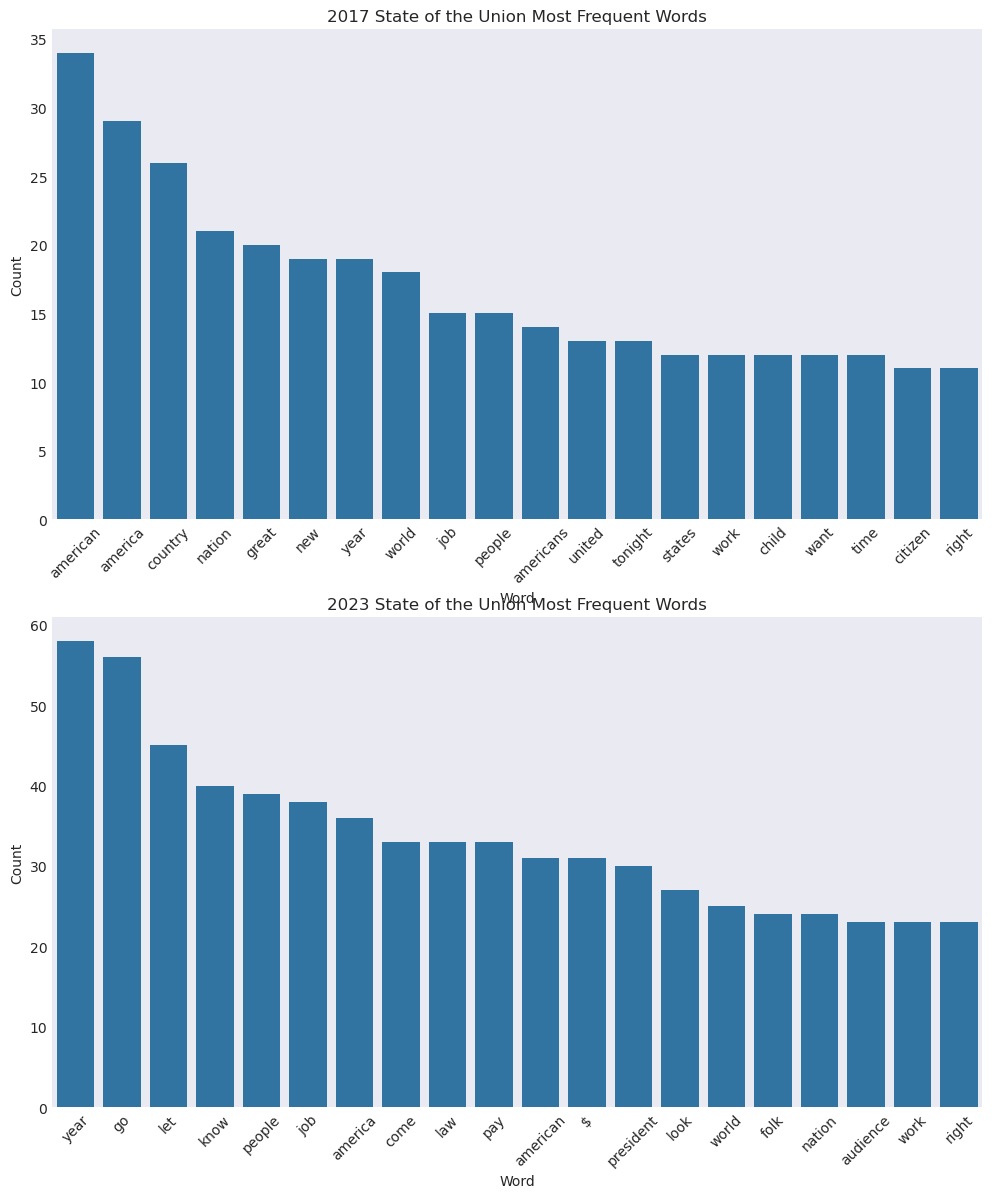

In [71]:
# Hint - use seaborn, subplots, and rotate tick labels
import seaborn as sns

fig, axs = plt.subplots(nrows=2, figsize=(12,14))

sns.barplot(df_2017, x='Word', y='Count', ax=axs[0]).tick_params(axis='x', rotation=45)
sns.barplot(df_2023, x='Word', y='Count', ax=axs[1]).tick_params(axis='x', rotation=45)

axs[0].set_title('2017 State of the Union Most Frequent Words')
axs[1].set_title('2023 State of the Union Most Frequent Words')

### TF-IDF Vectorization

To use statsitical alorithms on documents, we need to transform them into vectors, where each element of the vector corresponds to a particular word in a document or corpus of documents. One common way is via TF-IDF embeddings. LLMs work similarly - they typically use transformer models to generate text embeddings before sending text through a deep neural network. 

Here we will fit a TF-IDF vectorizer, plot all the speeches on a 2-D grid using PCA and also using a heatmap, and examine TF-IDF scores for the top 10 most common words in the first speech. This is a good resource here: https://medium.com/GeoffreyGordonAshbrook/vector-visualization-2d-plot-your-tf-idf-with-pca-83fa9fccb1d 

In [72]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

#from nltk.tokenize.casual import casual_tokenize

#### Train the Vectorizer and Transform the Data

In [73]:
# you may use this as input to fit the TF-IDF vectorizer
raw_docs = sou["Text"].to_list()

In [74]:
# Hint - use fit_transform for vectorizer and PCA

tfidf_model = TfidfVectorizer() # select model; leave tokenizer blank to use default tokenization model; alternatively, use casual_tokenize from nltk

tfidf_vectors = tfidf_model.fit_transform(raw_documents=raw_docs).toarray() # fit model

The output of `fit_transform()` will be a matrix where each row corresponds to a speech, each column corresponds to a word in the corpus of speeches, and the value is the TF-IDF score which measures the importance of that word in that speech, relative to the rest of the speeches.

#### Plot Speeches

- First used PCA to generate the first chart
- Second use seaborn heatmap with a log-scaled color axis to generate the second chart

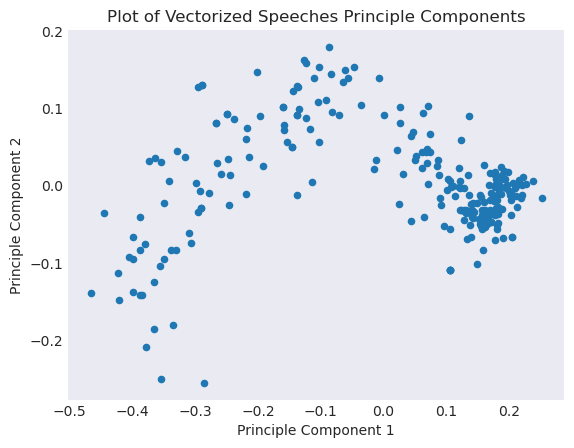

In [75]:
# Step 1: Set PCA to find first 2 principal components
pca = PCA(n_components=2)

# Step 2: Create a new dataframe where each row is a speech, and each column is a projection onto
# one of the two principal components
name_of_vector_array = tfidf_vectors
df2d = pd.DataFrame(pca.fit_transform(name_of_vector_array), columns=list('xy'))

# Plot Data Visualization (Matplotlib)
df2d.plot(kind='scatter', x='x', y='y')
plt.xlabel("Principle Component 1")
plt.ylabel("Principle Component 2")
plt.title("Plot of Vectorized Speeches Principle Components")
plt.show()

In [76]:
# Hint - vectorized_docs is a sparse matrix whose rows are speeches and columns are tokens, with each
# value being a TF-IDF score. Densify this array first, and then plot using seaborn.

#### Get the TF-IDF value for certain words and documents

In [77]:
word_list = ['year',
 'america',
 'people',
 'american',
 'work',
 'new',
 'job',
 'country',
 'americans',
 'world'] # top ten most common words through whole corpus

In [78]:
word_nums = [tfidf_model.vocabulary_[word] for word in word_list] # get each word's index number using the .vocabular_ attributed of vectorizer

In [79]:
idf_score = [tfidf_model.idf_[i] for i in word_nums] # get their IDF score by using .idf_ at the indices from the previous step

In [80]:
tf_idf = [tfidf_vectors[0][i] for i in word_nums] # get the tf_idf score for the first speech

In [81]:
pd.DataFrame({"Word": word_list, "IDF Score": idf_score, "TF-IDF Score": tf_idf})

,Word,IDF Score,TF-IDF Score
0,year,1.032925,0.022719
1,america,1.272946,0.068439
2,people,1.037118,0.043087
3,american,1.102217,0.045792
4,work,1.162281,0.005681
5,new,1.024591,0.016275
6,job,2.043480,0.009988
7,country,1.008130,0.013550
8,americans,1.713598,0.041877
9,world,1.138750,0.026438


## Part 3: Advanced Text Processing - LDA and BERTopic Topic Modeling (20 pts)

**Resources:**
- LDA:
    - https://medium.com/sayahfares19/text-analysis-topic-modelling-with-spacy-gensim-4cd92ef06e06 
    - https://www.kaggle.com/code/faressayah/text-analysis-topic-modeling-with-spacy-gensim#%F0%9F%93%9A-Topic-Modeling (code for previous post)
    - https://towardsdatascience.com/topic-modelling-in-python-with-spacy-and-gensim-dc8f7748bdbf/ 
- BERTopic:
    - https://maartengr.github.io/BERTopic/getting_started/visualization/visualize_documents.html#visualize-documents-with-plotly 
    - https://maartengr.github.io/BERTopic/getting_started/visualization/visualize_topics.html 


In [82]:
from spacy import displacy
from bertopic import BERTopic
from gensim.corpora import Dictionary
from gensim.models import LdaModel
from sklearn.feature_extraction.text import CountVectorizer
import pyLDAvis
import pyLDAvis.gensim_models
import warnings
warnings.filterwarnings("ignore")

### LDA

- Train an LDA model with 18 topics
- Output the top 10 words for each topic. 
- Output the topic distribution for the first speech
- Make a visualization

You may use the next two cells to process the data.

In [83]:
def preprocess_text(text): 
    doc = nlp(text) 
    return [token.lemma_.lower() for token in doc if not token.is_stop and not token.is_punct and not token.is_space and len(token.lemma_) > 3]

In [84]:
# Process all texts - note this takes ~ 5 minutes to run
processed_docs = sou['Text'].apply(preprocess_text)

To train an LDA model, use the LdaModel function that we imported a couple of cells back. The last resource linked under the LDA section is especially useful for walking through the steps we have below. *Note: one of the arguments to the LdaModel function is `random_state` which specifies the random seed for reproducibility. Please set yours to 42. Further, the last resource provided uses `LdaMulticore` which is essentially a parallelizable version of our function `LdaModel`. Use `LdaModel` instead, but the usage will be similar, except you can ignore the `iterations` and `workers` arguments..*.

In [85]:
# Build dictionary from processed_docs, which is a list of tokens extracted from our speeches
dictionary = Dictionary(processed_docs)
corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

In [86]:
# train LDA model with 18 topics
lda_model = LdaModel(corpus=corpus, num_topics=18, id2word=dictionary, random_state=42)

In [87]:
# print the top 10 words for each topic
print("--- LDA Topics ---")
for topic, words in lda_model.print_topics(num_topics=-1):
    print(f"Topic: {topic}")
    print("Words:", words)
    print()

--- LDA Topics ---
Topic: 0
Words: 0.011*"government" + 0.009*"year" + 0.007*"country" + 0.007*"states" + 0.005*"united" + 0.005*"congress" + 0.005*"people" + 0.004*"public" + 0.004*"great" + 0.004*"nation"

Topic: 1
Words: 0.010*"states" + 0.009*"year" + 0.008*"congress" + 0.007*"government" + 0.006*"people" + 0.006*"great" + 0.006*"nation" + 0.005*"united" + 0.005*"country" + 0.005*"time"

Topic: 2
Words: 0.014*"year" + 0.007*"government" + 0.006*"people" + 0.006*"states" + 0.005*"time" + 0.005*"great" + 0.005*"country" + 0.005*"work" + 0.005*"congress" + 0.005*"nation"

Topic: 3
Words: 0.010*"government" + 0.009*"united" + 0.008*"congress" + 0.008*"states" + 0.007*"nation" + 0.007*"year" + 0.006*"country" + 0.006*"people" + 0.005*"state" + 0.004*"great"

Topic: 4
Words: 0.010*"government" + 0.009*"year" + 0.006*"people" + 0.006*"congress" + 0.006*"united" + 0.006*"country" + 0.006*"states" + 0.005*"great" + 0.004*"state" + 0.004*"time"

Topic: 5
Words: 0.011*"government" + 0.008*"co

In [88]:
# print the topic distribution for the first speech
first_speech = corpus[0]
lda_model.get_document_topics(first_speech)

[(2, 0.9985286)]

In [89]:
# make a visualization using pyLDAvis
pyLDAvis.enable_notebook()
pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
10    -0.010622 -0.001251       1        1  17.072361
2      0.011838 -0.000912       2        1  15.368183
7      0.000654 -0.002225       3        1  14.247782
17    -0.001919 -0.002001       4        1  12.021578
6     -0.004280 -0.001540       5        1   8.489540
8      0.002731  0.001767       6        1   7.200436
0      0.000499 -0.001975       7        1   4.937174
12    -0.006242  0.003161       8        1   4.494998
3     -0.001943 -0.000031       9        1   3.846135
14     0.003122 -0.002060      10        1   3.518143
1      0.000791  0.000360      11        1   2.104685
13     0.001031 -0.001927      12        1   1.747777
15    -0.003763  0.001190      13        1   1.212583
11     0.006729  0.002632      14        1   1.118139
5     -0.001000  0.001533      15        1   1.039690
4      0.001458 -0.000362      16        1   0.853642
9      0.000183  0.002443      17        1   0.505018
16     0.000731  0.001200      18        1   0.222137, topic_info=            Term         Freq        Total Category  logprob  loglift
1524  government  8391.000000  8391.000000  Default  30.0000  30.0000
1249        year  7264.000000  7264.000000  Default  29.0000  29.0000
1065      states  6515.000000  6515.000000  Default  28.0000  28.0000
223     congress  5060.000000  5060.000000  Default  27.0000  27.0000
807       people  4234.000000  4234.000000  Default  26.0000  26.0000
...          ...          ...          ...      ...      ...      ...
737     national     4.605296  2257.944349  Topic18  -5.9694  -0.0854
50       america     4.388377  2039.460105  Topic18  -6.0177  -0.0318
957        right     4.570136  2313.471930  Topic18  -5.9771  -0.1173
560     increase     4.529903  2645.401254  Topic18  -5.9859  -0.2602
1579    interest     4.467768  2697.521802  Topic18  -5.9997  -0.2936

[1678 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
9242      1  0.194413    --in
9242      2  0.194413    --in
9242      3  0.194413    --in
9242      6  0.194413    --in
9253      1  0.078712    --to
...     ...       ...     ...
1249     15  0.007709    year
1249     16  0.008673    year
1249     17  0.004405    year
1249     18  0.001514    year
6667      2  0.234135  zarfos

[8767 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[11, 3, 8, 18, 7, 9, 1, 13, 4, 15, 2, 14, 16, 12, 6, 5, 10, 17])

### BERTopic

- Train a BERTopic model with a `min_topic_size` of 3 *Hint: use `BERTopic` to instantiate the model and specify `min_topic_size` in here. Actually fit the model using `fit_transform`, which `docs` passed into this.*
- Output the top 10 words for each topic. 
- Output the topic distribution for the first speech
- Make a visualization of the topics (see topic_model.visualize_topics())

In [90]:
docs = sou['Text'].to_list()

In [91]:
# train the model - this takes about 30 seconds
# remove stop words from the topics (Hint: use CountVectorizer and then .update_topics on topic_model)

topic_model = BERTopic(min_topic_size=3)
topics, probs = topic_model.fit_transform(docs)
vectorizer_model = CountVectorizer(stop_words="english")
topic_model.update_topics(docs, vectorizer_model=vectorizer_model)

In [92]:
# output the top 10 words for each topic - hint see get_topic_info
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,40,-1_government_states_united_congress,"[government, states, united, congress, public,...",[\nTo the Congress of the United States:\nIn d...
1,0,91,0_world_america_new_people,"[world, america, new, people, american, years,...","[\nMr. President, Mr. Speaker, Members of the ..."
2,1,16,1_states_government_united_congress,"[states, government, united, congress, public,...",[\nFellow-Citizens of the Senate and House of ...
3,2,15,2_states_united_government_public,"[states, united, government, public, congress,...",[\nFellow-Citizens of the Senate and of the Ho...
4,3,11,3_government_great_law_work,"[government, great, law, work, public, busines...",[\nTo the Senate and House of Representatives:...
5,4,10,4_government_states_law_united,"[government, states, law, united, year, gold, ...",[\nTo the Senate and House of Representatives:...
6,5,9,5_states_government_congress_united,"[states, government, congress, united, public,...",[\nThe relations of the United States with all...
7,6,8,6_states_united_government_constitution,"[states, united, government, constitution, sta...",[\nTo the Senate and House of Representatives:...
8,7,6,7_government_states_public_general,"[government, states, public, general, united, ...",[\nFellow-Citizens of the Senate and of the Ho...
9,8,5,8_national_federal_reduction_public,"[national, federal, reduction, public, governm...",[\n[ As delivered in person before a joint ses...


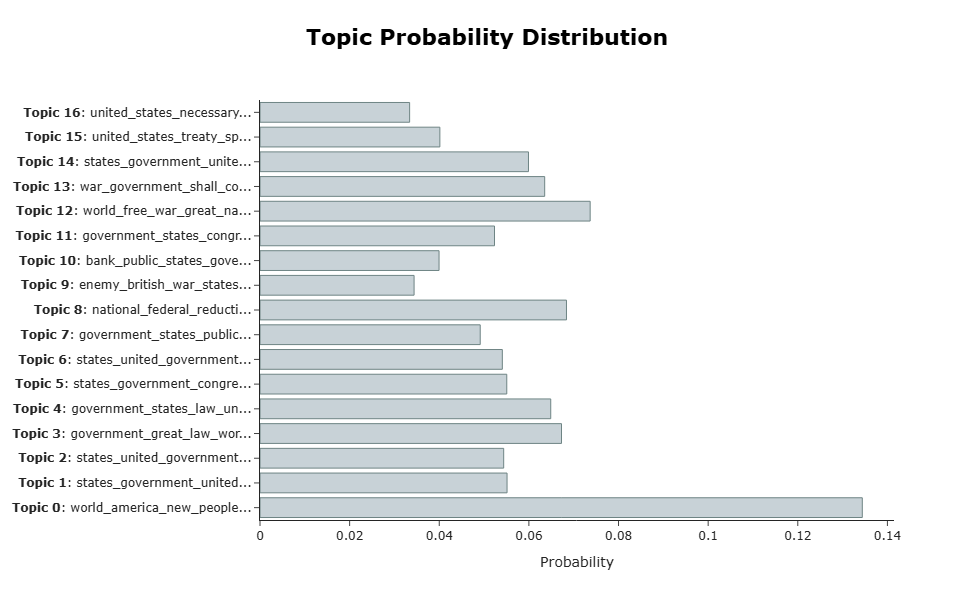

In [93]:
topic_distr, _ = topic_model.approximate_distribution(docs, min_similarity=0)
topic_model.visualize_distribution(topic_distr[0])

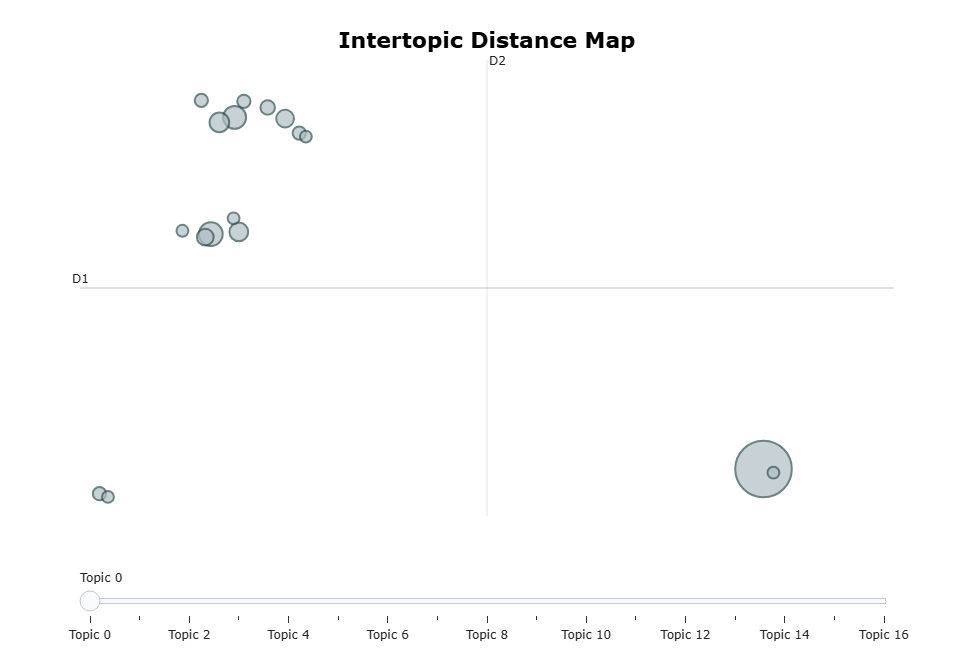

In [94]:
topic_model.visualize_topics()